In [35]:
from DA import Import, Anova
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
column_names = {"doorlooptijd [s]":"Handbagage", 
                    "doorlooptijd [s].1":"Bodyscan",
                    "doorlooptijd [s].2":"Douane"}

n = 10
a = 3
alpha = 0.05

In [37]:
Data = Import("Data.xlsx", column_names, n)
df, df_melt, names, mean, std = Data.import_df()

In [66]:
df

,Handbagage,Bodyscan,Douane
0,200,215,218
1,207,174,183
2,191,210,210
3,215,178,225
4,220,162,235
5,205,188,179
6,225,205,230
7,157,220,267
8,220,167,201
9,225,184,196


In [65]:
df_melt

,index,treatment,value,means,residual
0,0,Handbagage,200,206.5,-6.5
1,1,Handbagage,207,206.5,0.5
2,2,Handbagage,191,206.5,-15.5
3,3,Handbagage,215,206.5,8.5
4,4,Handbagage,220,206.5,13.5
5,5,Handbagage,205,206.5,-1.5
6,6,Handbagage,225,206.5,18.5
7,7,Handbagage,157,206.5,-49.5
8,8,Handbagage,220,206.5,13.5
9,9,Handbagage,225,206.5,18.5


In [38]:
means = np.mean(df_melt['value'].values)
stds = np.std(df_melt['value'].values)
print(means, stds)

203.73333333333332 23.884350990182302


In [63]:
var_cof = np.divide(stds,means)
var_cof

0.11723339818479533

dus grafiek gaat nog niet brrr

In [40]:
anova = Anova(df_melt, mean, alpha, n, a)
df_melt, anova_table, pvalue, lsd = anova.anova()

H0 accepted
1-2: no significant difference 
1-3: no significant difference 
2-3: SIGNIFICANT DIFFERENCE!


H0: De treatments zijn niet verschillend. -> hebben ze geen invloed op elkaar. (vallen onder dezelfde normale verdeling).

H0 geaccepteerd wordt -> er is geen significant verschil tussen de treatments, maar LSD zegt van wel.

In [62]:
print(pvalue, alpha)

0.07280792223110015 0.05


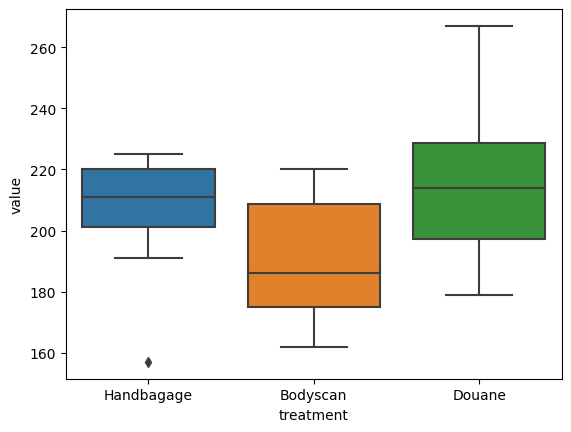

In [41]:
anova.boxplot()

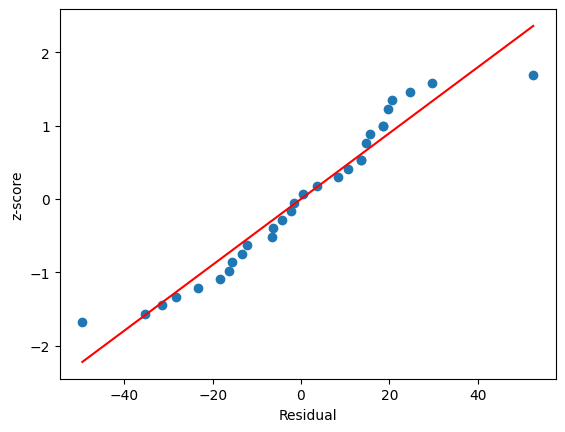

In [42]:
anova.norm_plot()

De metingen volgen significant geen normale verdeling.

# Correlatiecoëfficiënt

Niet zeker wat we moeten bereken
-> verwachting correlatie onderling

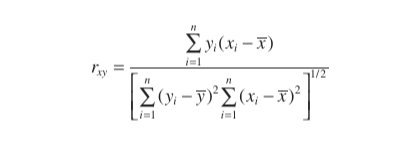

In [43]:
df

,Handbagage,Bodyscan,Douane
0,200,215,218
1,207,174,183
2,191,210,210
3,215,178,225
4,220,162,235
5,205,188,179
6,225,205,230
7,157,220,267
8,220,167,201
9,225,184,196


# Correlatie dubbel checken

In [44]:
r12 = stats.pearsonr(df["Handbagage"].values, df["Bodyscan"].values)
r13 = stats.pearsonr(df["Handbagage"].values, df["Douane"].values)
r23 = stats.pearsonr(df["Bodyscan"].values, df["Douane"].values)


r = [r12[0], r13[0], r23[0]]

r

[-0.666755516250697, -0.48267241442494546, 0.422688952907181]

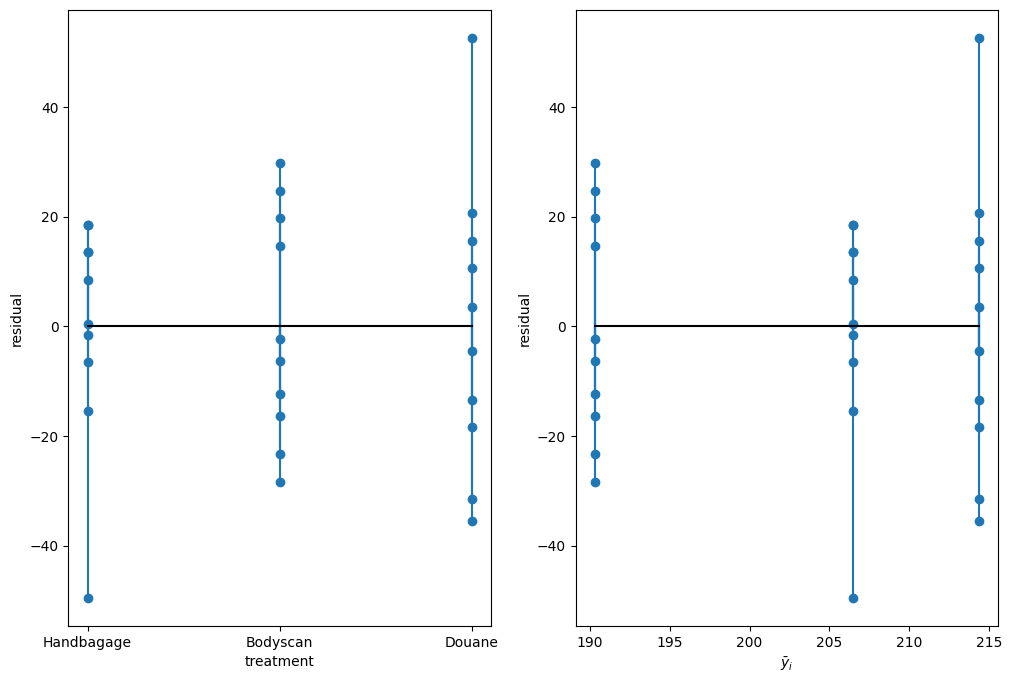

In [45]:
anova.res_plot()

# We gaan ervan uit dat het normaal verdeel is, maar ome Jo vragen.

Ome Jo zei ja.

# Betrouwbaarheidsinterval gemiddelde van populatie

In [46]:
t = stats.t.ppf(1-alpha/2, df=9)

$$\bar{x} - t \frac{s}{\sqrt{n}} < \mu < \bar{x} + t \frac{s}{\sqrt{n}}$$

In [47]:
xmin = means - t*stds/(np.sqrt(n))
xmax = means + t*stds/(np.sqrt(n))

print(xmin, "\n", xmax)


186.64749790831127 
 220.81916875835537


$$ 186,65 < \mu < 220,82 $$

# Bepaling van uitschieters

In [48]:
q1 = df["Handbagage"].quantile(0.25)
q3 = df["Handbagage"].quantile(0.75)

IQR = q3-q1

outliers = df["Handbagage"][((df["Handbagage"]<(q1-1.5*IQR)) | (df["Handbagage"]>(q3+1.5*IQR)))]
outliers

7    157
Name: Handbagage, dtype: int64

uitschieter van $157$

In [49]:
q1 = df["Bodyscan"].quantile(0.25)
q3 = df["Bodyscan"].quantile(0.75)

IQR = q3-q1

outliers = df["Bodyscan"][((df["Bodyscan"]<(q1-1.5*IQR)) | (df["Bodyscan"]>(q3+1.5*IQR)))]
outliers

Series([], Name: Bodyscan, dtype: int64)

In [50]:
q1 = df["Douane"].quantile(0.25)
q3 = df["Douane"].quantile(0.75)

IQR = q3-q1

outliers = df["Douane"][((df["Douane"]<(q1-1.5*IQR)) | (df["Douane"]>(q3+1.5*IQR)))]
outliers

Series([], Name: Douane, dtype: int64)

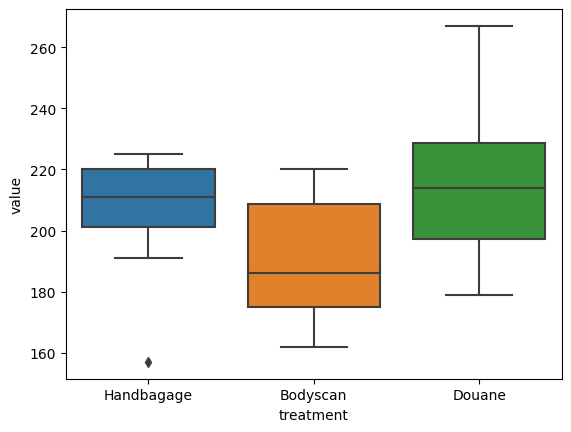

In [51]:
anova.boxplot()

# Skewness en kurtosis

$$sk = \frac{3 \bar{x} - Md}{s}$$

$Md$ = Mediaan


Op pearson manier

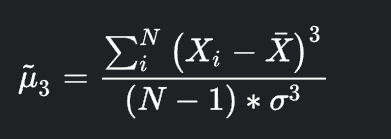

Kurtosis op fisher en pearson manier

In [52]:
skew = stats.skew(df_melt['value'].values)
skew

0.10794195429571911

In [53]:
kurt = stats.kurtosis(df_melt['value'].values, fisher=False)
kurt

3.07286319087321

# Antwoorden van ome Jo

Waarom is kurtosis zo verschillend en welke manier moeten we gebruiken?

- Fisher methode voor discrete metingen
- Pearson methode voor continu metingen (in ons geval van toepassing)

<AxesSubplot: xlabel='value', ylabel='Count'>

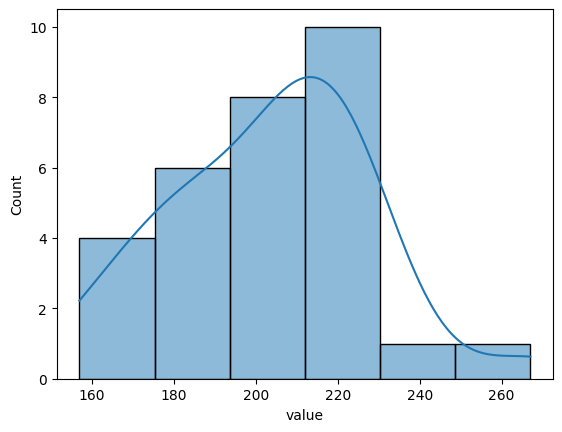

In [54]:
sns.histplot(data=df_melt, x='value', kde=True)

# Bepaling van steekproefomvang

- gebruik van t-verdeling, $s^2$

$$n \geq \frac{t^2 \sigma^2}{a^2}

In [55]:
t = stats.t.ppf(1-alpha/2, n, a)
std

[19.63797341886377, 19.753733824267247, 25.17220689570146]

In [58]:
a = np.linspace(10,100, 500)
n1 = stds**2 * t**2/a**2
dnda = -2*t**2*stds**2/a**3

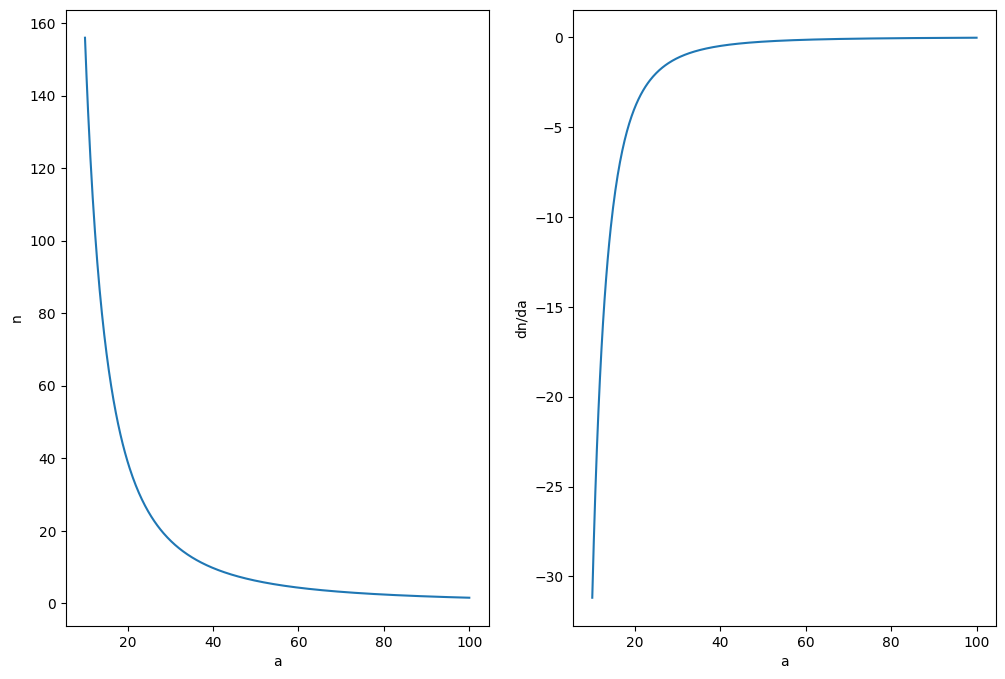

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.plot(a,n1)
ax1.set_xlabel("a")
ax1.set_ylabel("n")
ax2.plot(a,dnda)
ax2.set_xlabel("a")
ax2.set_ylabel("dn/da")
plt.show()


# Toetsen



In [60]:
df

,Handbagage,Bodyscan,Douane
0,200,215,218
1,207,174,183
2,191,210,210
3,215,178,225
4,220,162,235
5,205,188,179
6,225,205,230
7,157,220,267
8,220,167,201
9,225,184,196


In [61]:
print(xmin, xmax)

186.64749790831127 220.81916875835537


$$\mu = \bar{x} \pm t \frac{s}{\sqrt{n}}$$